Want to see if there is any data to test whether higher Ct values correlate to a lower sequencing success rate

In [10]:
import os
import sys
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Settings

In [2]:
data_dir = os.path.expanduser("~/Dropbox/Zambia_nCoV/Data/")

# Data prep

In [19]:
#Read in all of the sequencing data
sequenced_fn = "allsequencedata.csv"
sequenced_df = pd.read_csv(os.path.join(data_dir, "Sequencing_Data", sequenced_fn), 
                          sep="\t")
print("%d samples recorded from %s" % (sequenced_df.shape[0],sequenced_fn))
print("   Dropping controls from the list")
sequenced_df.query("Type == 'Sample'", inplace=True)
#Replace NA with zeros
sequenced_df['sequencing_depth_avg'] = sequenced_df['sequencing_depth_avg'].fillna(0)
sequenced_df['coverage_breadth'] = sequenced_df['coverage_breadth'].fillna(0)
print("     %d samples remain" % sequenced_df.shape[0])
print("")
print("Failed to generate a consensus sequence from %d samples" % sequenced_df.query("sequencing_depth_avg == 0").shape[0])
print("Success rate of %d%%" % (sequenced_df.query("sequencing_depth_avg != 0").shape[0]/sequenced_df.shape[0]*100))

#Remove additional columns
keep_cols = ['SampleID','SeqID','Ctvalue','coverage_breadth','sequencing_depth_avg']
sequenced_df = sequenced_df[keep_cols]
print("")

ct_bins=[8,10,12,14,16,18,20,22,24,26,28,30,32]
sequenced_df['ct_bin'] = pd.cut(sequenced_df['Ctvalue'], ct_bins)
print("Created Ctvalues into bins %s" % ct_bins)

898 samples recorded from allsequencedata.csv
   Dropping controls from the list
     870 samples remain

Failed to generate a consensus sequence from 30 samples
Success rate of 96%

Created Ctvalues into bins [8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]


# Analysis

<AxesSubplot:xlabel='Ctvalue', ylabel='sequencing_depth_avg'>

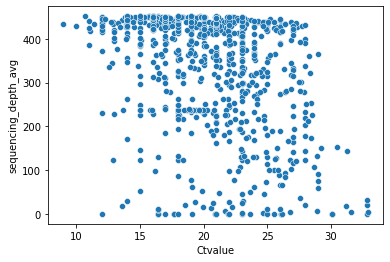

In [20]:
sns.scatterplot(data=sequenced_df,
            x="Ctvalue",
            y="sequencing_depth_avg")

<AxesSubplot:xlabel='ct_bin', ylabel='sequencing_depth_avg'>

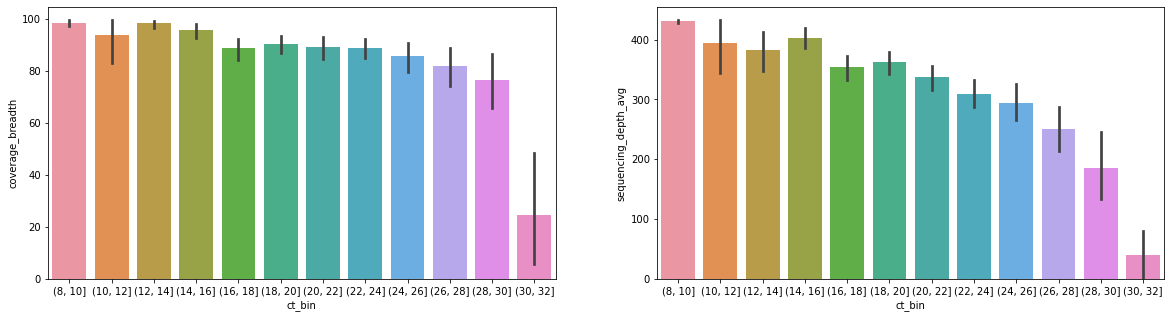

In [22]:
#Create axes
fig, axes = plt.subplots(1, 2,figsize=(20, 5))
#Add data
sns.barplot(ax=axes[0], data=sequenced_df,
            x="ct_bin",
            y="coverage_breadth")
sns.barplot(ax=axes[1], data=sequenced_df,
            x="ct_bin",
            y="sequencing_depth_avg")